In [1]:
import pandas as pd

import statsmodels.api as sm
import pandas as pd
import datetime
from pathlib import Path

pd.set_option("display.max_columns", None)
# !pip install statsmodels


# %config InlineBackend.figure_format = "svg"
# %config InlineBackend.print_figure_kwargs = {"dpi" : 300}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# from cadFace.vis import percentiles_plot
import sci_palettes

try:
    sci_palettes.register_cmap()
except:
    pass
import scienceplots
from pathlib import Path
import pandas as pd
from ppp_aging.ppp_model import *
from ppp_aging.model import generate_states_cols

plt.style.use(["nature", "no-latex"])
sns.set_context("paper", font_scale=1.5)
sns.set_palette("nejm")

In [2]:
train_all = pd.read_pickle("result/part1/train_imputed.pkl")
test_all = pd.read_pickle("result/part1/test_imputed.pkl")


# idx = test_all.columns.tolist().index("C3")


# train_all = train_all.iloc[:, :idx]
# test_all = test_all.iloc[:, :idx]
# test_all

In [3]:
test_all.columns.tolist().index("C3")

62

In [4]:
method = "d_model"

if method == "d_model":
    suffix = "geneformer_features"
elif method == "d_protein":
    suffix = "geneformer_features_proteindim"

num = 200  # or 2048
train = pd.read_pickle(
    f"result/dl/geneformer/data/imputed_{num}/train_{suffix}.pkl"
).merge(train_all, how="inner")
test = pd.read_pickle(
    f"result/dl/geneformer/data/imputed_{num}//test_{suffix}.pkl"
).merge(test_all, how="inner")

In [5]:
test

eid  incident_cad  feature_0  feature_1  feature_2  feature_3  \
0      2883530.0             0  -0.556628   2.427585  -0.025903  -0.398411   
1      2867444.0             0  -0.301608   2.439559   0.891382  -0.568158   
2      5869793.0             0  -0.527668   1.825767   1.063137  -0.368034   
3      4880838.0             0  -0.855476   1.241945   0.959774  -0.164651   
4      3987428.0             0  -0.607380   0.819588   1.181920  -0.708555   
...          ...           ...        ...        ...        ...        ...   
15427  5241912.0             1  -0.481083   1.540433   1.177004  -0.622910   
15428  3851862.0             1  -0.317312   2.304467   0.469589  -1.093289   
15429  1144512.0             0  -0.184050   2.400215   1.272393   0.011203   
15430  1177099.0             0  -0.117911   1.829292   1.081953  -0.415402   
15431  3881441.0             0  -0.436309   2.642419   0.688384  -0.715234   

       feature_4  feature_5  feature_6  feature_7  feature_8  feature_9  \
0      -0.199921   0.628902   0.863421  -1.551665  -0.137318  -1.920244   
1      -0.568812   0.532222   0.868703  -1.563028  -0.017042  -1.965866   
2      -0.649271   0.361107   0.791280  -1.487135  -0.214876  -0.843232   
3      -0.624670   0.277242   0.718812  -1.035436   0.002938  -1.996194   
4      -0.682925   0.044434   0.610431  -1.200778   0.094405  -1.335361   
...          ...        ...        ...        ...        ...        ...   
15427  -1.167271   0.078492   0.874623  -1.372964   0.277119  -0.868340   
15428  -0.305707   0.220190   1.093080  -2.290200  -0.535463  -1.163794   
15429  -0.982669   0.509859   0.874154  -1.038192  -0.191601  -1.487823   
15430  -1.133648   0.531038   0.927534  -1.282851  -0.446880  -1.531994   
15431  -0.503321   0.444168   0.981032  -1.941522  -0.627463  -1.426488   

       feature_10  feature_11  feature_12  feature_13  feature_14  feature_15  \
0       -0.351930    1.888880   -0.616086   -0.064189    0.905367   -0.005432   
1       -0.201925    1.637832   -0.388205   -0.045071    0.977087   -0.021124   
2       -0.173807    0.773107   -0.929213   -0.074416    1.080494   -0.544878   
3        0.246087    1.939946   -0.504401    0.234832    0.995960    0.050883   
4       -0.077394    1.521792   -0.452828    0.430313    1.484407   -0.325284   
...           ...         ...         ...         ...         ...         ...   
15427    0.155244    1.867426   -0.839930    0.374000    1.116359   -0.379287   
15428   -0.334352    1.722286    0.308672    0.066866    0.636649   -0.013191   
15429    0.185365    1.878982   -0.915846   -0.088697    1.026129   -0.427041   
15430   -0.332816    1.716924   -0.566953    0.143762    0.855366   -0.289846   
15431   -0.333899    1.796358    0.260309    0.136471    0.952579    0.189485   

       feature_16  feature_17  feature_18  feature_19  feature_20  feature_21  \
0       -0.868972   -0.586299   -1.182607   -0.254459   -0.382093   -0.171638   
1       -0.367912   -0.882196   -0.608499   -0.129719    0.161064    0.111544   
2        0.082191   -0.665780   -0.824377   -0.059566   -0.054438    0.429381   
3       -0.052658   -0.554578   -0.558200    0.010572    0.174469    0.336584   
4       -0.021635    0.037100   -0.834047   -0.762393    0.101927    0.481796   
...           ...         ...         ...         ...         ...         ...   
15427   -0.192625   -0.602636   -0.305945   -0.039813   -0.161242    0.044867   
15428   -0.182984   -0.101030   -0.843720    0.073444   -0.036466   -0.413620   
15429    0.177603   -0.259173   -0.611072   -0.192611    0.222007    0.337435   
15430    0.065001   -0.673760   -0.822592   -0.335476   -0.077556    0.187397   
15431   -0.108664   -0.246275   -0.850618   -0.207010    0.326058   -0.605580   

       feature_22  feature_23  feature_24  feature_25  feature_26  feature_27  \
0        0.090483    0.891277   -0.172878   -0.472289   -0.214279   -0.673369   
1        0.337085    0.529989   -0.415848   -1.017823   -0.561370  

In [6]:
features = [i for i in train.columns if "feature" in i]
label = "incident_cad"

cofounders = ["assessment_center", "age", "sex", *[f"PC{i}" for i in range(1, 11)]]

In [7]:
from ppp_prediction.corr import cal_corr, generate_multipletests_result

single_association_proteins_result_df = cal_corr(
    pd.concat([train, test]),
    features,
    y=label,
    cofounders=cofounders,
    model_type="logit",
)  # 使用原始没有imputated版本

Output()

/home/xutingfeng/ukb/project/ppp_prediction/ppp_prediction/corr.py:240: TqdmExperimentalWarning: rich is experimental/alpha
  for x_ in tqdm(x, desc="processing", total=len(x)):


In [ ]:
single_association_proteins_result_df = generate_multipletests_result(
    single_association_proteins_result_df
).sort_values("pval_corrected")
single_association_proteins_result_df

,var,exposure,model,pvalue,coef,std,z,upper,lower,AUC,ACC,Macro_F1,Sensitivity,Specificity,APR,pearsonr,spearmanr,explained_variance_score,r2_score,n_case,n_control,pval_corrected,reject
243,feature_243,incident_cad,logit,0.0,-0.540776,0.087948,-6.148837,-0.71315,-0.368402,0.724342,0.627746,0.466525,0.709253,0.623021,0.125927,0.189764,0.177208,0.035993,0.035993,2810,48260,0.0,True
0,feature_0,incident_cad,logit,0.0,-0.649778,0.108702,-5.977609,-0.86283,-0.436726,0.72442,0.5701,0.437929,0.774377,0.558226,0.125553,0.188897,0.177269,0.035661,0.035661,2810,48260,0.0,True
116,feature_116,incident_cad,logit,0.0,-0.561192,0.103859,-5.403382,-0.764752,-0.357631,0.724101,0.622009,0.464103,0.719929,0.616328,0.125935,0.188914,0.177018,0.035669,0.035669,2810,48260,0.000006,True
105,feature_105,incident_cad,logit,0.0,-0.588106,0.113776,-5.168971,-0.811103,-0.365109,0.723935,0.621754,0.463629,0.71637,0.616266,0.124916,0.188449,0.176886,0.035491,0.035491,2810,48260,0.000015,True
195,feature_195,incident_cad,logit,0.0,0.538068,0.104958,5.126493,0.332353,0.743782,0.72378,0.622322,0.464256,0.719573,0.61668,0.12573,0.188951,0.176764,0.035686,0.035686,2810,48260,0.000015,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,feature_103,incident_cad,logit,0.956849,0.00421,0.077801,0.054108,-0.148277,0.156696,0.722253,0.598727,0.452166,0.740925,0.590468,0.123539,0.186607,0.175557,0.034803,0.034803,2810,48260,0.974155,False
95,feature_95,incident_cad,logit,0.968548,-0.002551,0.064697,-0.03943,-0.129354,0.124252,0.722253,0.598394,0.451969,0.740925,0.590116,0.123529,0.186604,0.175557,0.034801,0.034801,2810,48260,0.980033,False
217,feature_217,incident_cad,logit,0.986896,-0.001925,0.117192,-0.016425,-0.231616,0.227767,0.722259,0.630057,0.467531,0.705338,0.625694,0.123518,0.186602,0.175562,0.034801,0.034801,2810,48260,0.990766,False
148,feature_148,incident_cad,logit,0.986708,-0.002171,0.130298,-0.016659,-0.25755,0.253209,0.722259,0.630135,0.467577,0.705338,0.625777,0.123511,0.186599,0.175562,0.034799,0.034799,2810,48260,0.990766,False


<Axes: xlabel='incident_cad', ylabel='feature_243'>

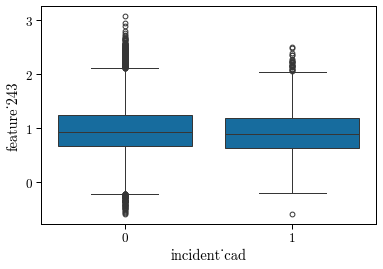

In [8]:
plt_features = ["incident_cad", "feature_243"]
sns.boxplot(
    data=pd.concat([train[plt_features], test[plt_features]]),
    x="incident_cad",
    y="feature_243",
)

In [9]:
passed_fatures = single_association_proteins_result_df.query("reject == True")[
    "var"
].values.tolist()
passed_fatures

NameError: name 'single_association_proteins_result_df' is not defined

In [7]:
RS = [
    "age",
    "sex",
    "ldl_a",
    "hdl_a",
    "tc_a",
    "tg_a",
    "sbp_a",
    "BMI",
    "smoking",
    "prevalent_diabetes",
]

need_protein = [
    "NTproBNP",
    "MMP12",
    "REN",
    "LTBP2",
    "LGALS4",
    "LPA",
    "NRCAM",
    "CD99",
    "BCAM",
    "VWC2",
    "GCHFR",
    "SPINT2",
    "SDC4",
    "SCN4B",
    "SERPINA3",
    "APLP1",
    "DPY30",
    "NOTCH3",
    "DTX3",
    "CDH3",
]

In [9]:
passed_fatures = [
    "feature_229",
    "feature_130",
    "feature_107",
    "feature_178",
    "feature_87",
    "feature_172",
    "feature_38",
    "feature_57",
    "feature_186",
    "feature_1",
    "feature_49",
    "feature_211",
    "feature_224",
    "feature_37",
    "feature_240",
    "feature_82",
    "feature_250",
    "feature_88",
    "feature_175",
    "feature_112",
    "feature_148",
    "feature_44",
    "feature_33",
    "feature_41",
    "feature_150",
    "feature_161",
    "feature_75",
    "feature_22",
    "feature_62",
    "feature_103",
    "feature_127",
    "feature_247",
    "feature_164",
    "feature_85",
    "feature_98",
    "feature_137",
    "feature_54",
    "feature_83",
    "feature_195",
    "feature_140",
    "feature_179",
    "feature_162",
    "feature_139",
    "feature_223",
    "feature_58",
    "feature_238",
    "feature_109",
    "feature_10",
    "feature_153",
    "feature_24",
    "feature_125",
    "feature_99",
    "feature_46",
    "feature_151",
    "feature_13",
    "feature_117",
    "feature_7",
    "feature_183",
    "feature_52",
    "feature_136",
    "feature_228",
    "feature_210",
    "feature_152",
    "feature_123",
    "feature_29",
    "feature_39",
    "feature_8",
    "feature_166",
    "feature_97",
    "feature_86",
    "feature_154",
    "feature_185",
    "feature_246",
    "feature_5",
    "feature_222",
    "feature_197",
    "feature_94",
    "feature_45",
    "feature_92",
    "feature_227",
    "feature_213",
    "feature_135",
    "feature_55",
    "feature_188",
    "feature_69",
    "feature_189",
    "feature_116",
    "feature_159",
    "feature_184",
    "feature_167",
    "feature_11",
    "feature_114",
    "feature_122",
    "feature_30",
    "feature_163",
    "feature_206",
    "feature_129",
    "feature_201",
    "feature_196",
    "feature_219",
    "feature_12",
    "feature_174",
    "feature_255",
    "feature_28",
    "feature_0",
    "feature_93",
    "feature_199",
    "feature_181",
    "feature_79",
    "feature_216",
    "feature_204",
    "feature_170",
    "feature_121",
    "feature_193",
    "feature_25",
    "feature_235",
    "feature_64",
    "feature_104",
    "feature_126",
    "feature_243",
    "feature_43",
    "feature_113",
    "feature_115",
    "feature_14",
    "feature_176",
    "feature_146",
    "feature_168",
    "feature_239",
    "feature_230",
    "feature_77",
    "feature_207",
    "feature_42",
    "feature_155",
]

In [10]:
from ppp_prediction.model import fit_best_model

res = []
for name, X_var in [
    ["RS + PRS + need_protein", RS + ["PRS"] + need_protein],
    ["features + PRS + RS + need_protein", features + ["PRS"] + RS + need_protein],
    # [
    #     "passed_fatures + RS + PRS + need_protein",
    #     passed_fatures + RS + ["PRS"] + need_protein,
    # ],
    ["RS + PRS", RS + ["PRS"]],
    ["featuers", features],
    # ["passed_fatures", passed_fatures],
    # ["passed_fatures + RS + PRS", passed_fatures + RS + ["PRS"]],
    ["features + RS + PRS", features + RS + ["PRS"]],
]:

    (
        model,
        train_metrics,
        test_metrics,
        train_imputed_data,
        test_imputed_data,
        best_models,
    ) = fit_best_model(
        train_df=train,
        test_df=test,
        # X_var=["PRS"] + RS + need_protein,
        # X_var=features + ["PRS"] + RS + need_protein,
        X_var=X_var,
        # X_var=passed_fatures + RS + ["PRS"] + need_protein,
        y_var=label,
        method_list="Lasso",
        cv=2,
    )
    test_metrics["name"] = name
    test[name] = model.predict(test[X_var])

    res.append(test_metrics)
# test_metrics

[I] [00:41:06.537223] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (32139, 31), val shape is (3571, 31), test shape is (15287, 31)
Fitting 2 folds for each of 10 candidates, totalling 20 fits
model: Lasso	Best parameters: {'model__alpha': 0.00046415888336127773}, with auc: 0.8083216645440026
can't assign feature names to model
[I] [00:41:17.855867] Unused keyword parameter: random_state during cuML estimator initialization


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


train shape: (32139, 287), val shape is (3571, 287), test shape is (15287, 287)
Fitting 2 folds for each of 10 candidates, totalling 20 fits
model: Lasso	Best parameters: {'model__alpha': 0.003593813663804626}, with auc: 0.8043407896310786
can't assign feature names to model
[I] [00:42:42.532973] Unused keyword parameter: random_state during cuML estimator initialization


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


train shape: (32139, 11), val shape is (3571, 11), test shape is (15287, 11)
Fitting 2 folds for each of 10 candidates, totalling 20 fits
model: Lasso	Best parameters: {'model__alpha': 0.00046415888336127773}, with auc: 0.7926250905943695
can't assign feature names to model
[I] [00:42:45.737417] Unused keyword parameter: random_state during cuML estimator initialization


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


train shape: (32406, 256), val shape is (3601, 256), test shape is (15432, 256)
Fitting 2 folds for each of 10 candidates, totalling 20 fits
model: Lasso	Best parameters: {'model__alpha': 0.00046415888336127773}, with auc: 0.6795022836475
can't assign feature names to model
[I] [00:43:53.528768] Unused keyword parameter: random_state during cuML estimator initialization


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


train shape: (32139, 267), val shape is (3571, 267), test shape is (15287, 267)
Fitting 2 folds for each of 10 candidates, totalling 20 fits
model: Lasso	Best parameters: {'model__alpha': 0.003593813663804626}, with auc: 0.7890083522731272
can't assign feature names to model


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [11]:
res_df = pd.DataFrame(res)
res_df

,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,Sensitivity_UCI,Sensitivity_LCI,Specificity,Specificity_UCI,Specificity_LCI,APR,APR_UCI,APR_LCI,name
0,0.795651,0.811012,0.779336,0.691895,0.698517,0.685089,0.509811,0.518486,0.502941,0.763636,0.790126,0.734364,0.687803,0.694156,0.680368,0.229443,0.260281,0.199610,RS + PRS + need_protein
1,0.793535,0.809023,0.780726,0.689802,0.697004,0.682080,0.508967,0.517072,0.500994,0.768485,0.801054,0.742299,0.685313,0.692504,0.678446,0.223276,0.250259,0.199087,features + PRS + RS + need_protein
2,0.777151,0.794372,0.762133,0.713155,0.719571,0.707246,0.517677,0.525796,0.510492,0.709091,0.737911,0.675959,0.713387,0.720162,0.707205,0.172430,0.191834,0.154571,RS + PRS
3,0.666038,0.687111,0.646224,0.686172,0.695440,0.679225,0.483349,0.491186,0.474874,0.552221,0.587374,0.519774,0.693815,0.700183,0.686252,0.105845,0.117291,0.088174,featuers
4,0.777146,0.792607,0.764602,0.715052,0.721793,0.708183,0.518503,0.527405,0.510510,0.705455,0.736234,0.676503,0.715600,0.721424,0.709603,0.173116,0.191348,0.152187,features + RS + PRS


In [20]:
test_imputed_data

,incident_cad,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,age,sex,ldl_a,hdl_a,tc_a,tg_a,sbp_a,BMI,smoking,prevalent_diabetes,PRS,incident_cad_pred
0,0,-0.556628,2.427585,-0.025903,-0.398411,-0.199921,0.628902,0.863421,-1.551665,-0.137318,-1.920244,-0.351930,1.888880,-0.616086,-0.064189,0.905367,-0.005432,-0.868972,-0.586299,-1.182607,-0.254459,-0.382093,-0.171638,0.090483,0.891277,-0.172878,-0.472289,-0.214279,-0.673369,-1.066068,-1.039961,-0.586294,-0.572288,0.149153,0.206430,0.601980,-0.741015,0.651937,0.636948,0.045599,-0.010197,-0.038568,-1.440470,0.697391,0.219089,0.006723,0.396782,-1.862717,-0.987834,-0.179839,0.151818,-0.315107,-0.327331,0.289051,0.680095,0.537737,-0.670043,-0.277058,1.196342,1.893380,0.109975,0.510133,-0.057431,0.645059,0.019901,-0.306244,-0.080342,0.246210,1.071650,-0.797124,0.770542,-1.013894,-0.289886,0.161488,0.717878,0.463617,0.514395,0.067315,0.297480,-0.500268,-0.561518,-0.471365,-0.515606,-0.057571,-0.311975,-0.137005,0.030842,-0.855465,-0.212662,-0.022732,0.041060,0.344434,-1.955729,0.724362,-0.549408,0.226778,0.571907,0.488458,-0.3

In [8]:
from ppp_prediction.model import fit_best_model

res = []
for name, X_var in [
    ["featuers", features],
]:

    (
        model,
        train_metrics,
        test_metrics,
        train_imputed_data,
        test_imputed_data,
        best_models,
    ) = fit_best_model(
        train_df=train,
        test_df=test,
        # X_var=["PRS"] + RS + need_protein,
        # X_var=features + ["PRS"] + RS + need_protein,
        X_var=X_var,
        # X_var=passed_fatures + RS + ["PRS"] + need_protein,
        y_var=label,
        method_list="Lasso",
        cv=2,
    )
    test_metrics["name"] = name
    test[name] = model.predict(test[X_var])
    train[name] = model.predict(train[X_var])
    res.append(test_metrics)
# test_metrics

[I] [09:54:22.997854] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (32406, 256), val shape is (3601, 256), test shape is (15432, 256)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 5.994842503189409e-05}, with auc: 0.67351595913195


In [14]:
train.rename(columns={name: "GeneFormerRS"}, inplace=True)
test.rename(columns={name: "GeneFormerRS"}, inplace=True)

In [17]:
train[["eid", "incident_cad", "GeneFormerRS"]].to_csv(
    "result/scores/GeneFormerRS_train.csv", index=False
)
test[["eid", "incident_cad", "GeneFormerRS"]].to_csv(
    "result/scores/GeneFormerRS_test.csv", index=False
)